# Clustering Algorithms
## K-Means and Spectral clustering
#### - Nhi Nguyen -

## I. Introduction

Unsupervised machine learning is one among three types of machine learning (the other two are supervised and reinforcement learning). In unsupervised learning, the model tries to learn from unlabeled datasets. In other words, the model tries to identify hidden patterns and structures in the data without a known target variable. Due to its rather ambiguous purpose, this type of machine learning involves lots of data groupings, which is why it is heavily built on clustering algorithms.

A cluster, in this case, can be defined as a group of data objects. The idea is for us to put objects that are similar to each other in some way into the same cluster. Data objects in one cluster should be dissimilar to those in other clusters. This serves our original purpose of discovering the data's structures and finding out possible ways to partition the data. Clustering can be applied into various fields, including data mining, image processing, pattern recognition, bioinformatics, etc.

There are many clustering algorithms that have been invented and used, of which the most popular are k-means, hierarchical clustering, DBSCAN (Density-Based Spatial Clustering of Applications with Noise), Spectral Clustering, Mean-Shift clustering algorithm. In this report, we will be discussing three common clustering algorithms: k-means, spectral clustering, and mean-shift clustering.

$\pagebreak$

## II. K-Means Algorithm

### 1. What Is K-Means Algorithm?

K-means algorithm is a clustering technique that partitions a dataset into K clusters, where each observation belongs to the cluster with the nearest mean or centroid. In simpler words, we use k-means algorithm to find the best way to divide our data points into groups based on their distance to the centroid of each group. "A centroid is the average position of all the points of an object". Mathematically, the goal of this algorithm is to minimize the sum of the squared distances between each observation and its assigned centroid. Below we will discuss in detail how k-means algorithm works.

Here is a diagram illustrating the big picture of what k-means algorithm does. Given a pool of unclassified data, it finds a cluster for each data point.

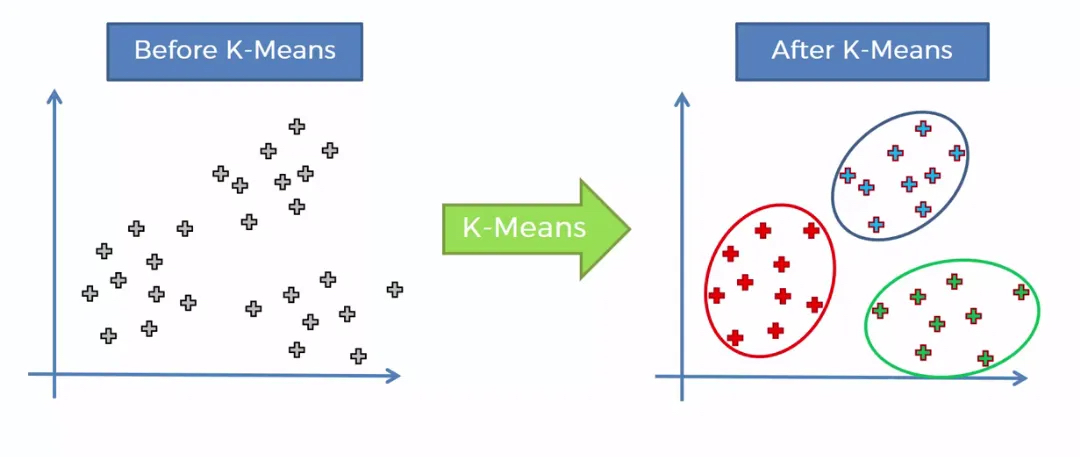

*Source: https://medium.datadriveninvestor.com/k-means-clustering-ac3ff1d3463d*

### 2. How Does K-Means Algorithm Work?

As mentioned above, k-means is a centroid-based clustering algorithm, where we calculate the distance between each data point and a centroid to assign it to a cluster. The goal is to identify the K number of groups in the dataset.

The k-means algorithm takes in 2 inputs:
- k: this integer parameter is the number of clusters into which we want to group our data
- X: this is our training data set. Mathematically, $X$ = {$x_1, x_2, ..., x_m$} where $x_i$ is a point in $R_n$

Here is a high-level description of how to perform k-means clustering:
1. Select a k value
2. Randomly choose k initial centroids. We will use the following notation for these centroids: $c_1, c_2, ..., c_k$ in $R_n$
3. Cluster assignment: We assign each point $x_i$ to the closest centroid
4. Update centroids: For each cluster, find the average of all points $x_i$ in that cluster. This average is the new centroid. The new centroid is updated using the following formula:
$$c_i = \frac{1}{S_i}\sum_{x \in S_i} x$$
5. Repeat step 3 and 4 until convergence. Convergence is defined as when none of the cluster assignment and centroid changes. This is equivalent to minimizing the following cost function:
$$\sum_{i}\sum_{x \in S_i}d(x, c_i)^2$$
    - $d(x, c_i)$ is the Euclidian distance between point $x$ and centroid $c_i$ in $R_n$.
    - This cost function represents the total squared distance from the centroid to the points of the cluster associated to the centroid.
    - Note that the distance function is not necessarily, though usually, the Euclidian distance. It can be any function that satisfy three axioms of distance measure.

Below is an illustration of one iteration of k-means algorithm:

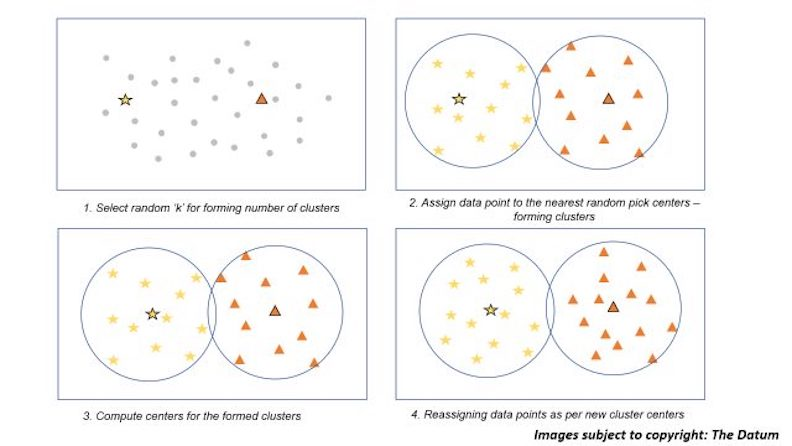

*Source: https://www.datasciencecentral.com/machine-learning-unsupervised-k-means-clustering-and/*

$\pagebreak$

### 3. How do we choose k?

Now we might wonder how to choose our k value. For some datasets it might be easy to visually pick k, but for many of them it will take some manual work. Choosing a bad k value could negatively affect our model performance and increase its run time. There are two common methods to help us pick out a reasonable k value: Elbow method and Silhouette method.

#### Elbow Method
Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow.

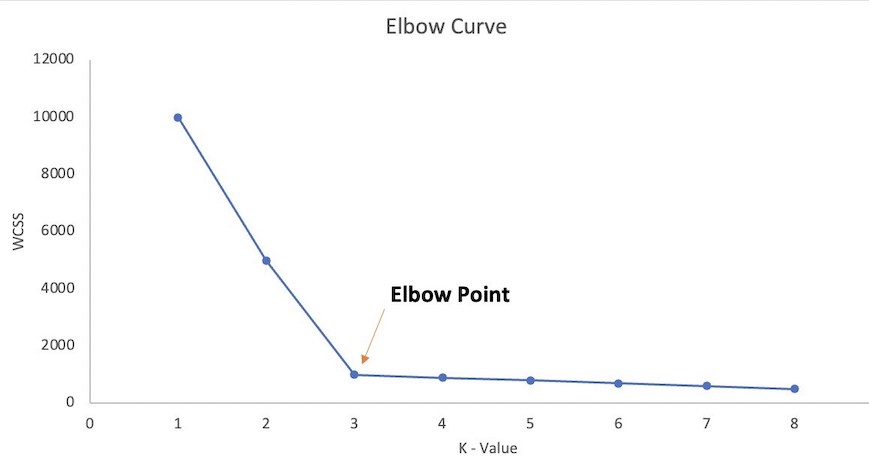

*Source: https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find-best-k-in-k-means-clustering-fc820da0631d*

#### Silhouette method:
Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of $[-1, 1]$.

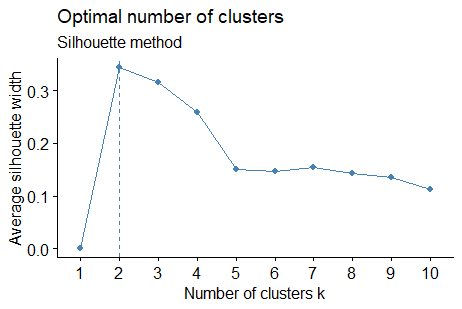

*Source: https://predictivehacks.com/how-to-determine-the-number-of-clusters-of-k-means-in-r/*

### 4. K-Means Algorithm Implementation

After discussing the idea behind k-means algorithm, let us implement a simple algorithm to illustrate the above steps.

We first import some libraries that we will use to generate data and visualization.

In [1]:
import seaborn as sns
from sklearn.cluster import KMeans
# ^^^ pyforest auto-imports - don't write above this line
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

#### Step 2: Initialize centroids

Now we define a function to randomly choose k initial centroids.

In [2]:
def initial_centroids(k, X):
    '''
    Randomly select k points as centroids
    - k: number of centroids -> int
    - X: dataset of observations -> pandas dataframe
    '''
    centroids = X.sample(k)
    return centroids

#### Step 3: Centroid assignment

Next we calculate the distance between each data point and each centroid, then assign the point to the cluster associated with its closest centroid. Here we use Euclidian distance.

In [3]:
def distance(a,b):
    '''
    Calculate the sum of squared errors,
    then take the square root of the result
    - a, b: points -> numpy arrays
    '''
    return np.sqrt(np.sum((a-b)**2))

Now we have the distances. We will compare these and pick out the shortest one for each point, see which centroid this distance is associated with, then assign the point to the cluster of that centroid. We also need to save the distances from each point to its centroid so we can use them later to determine convergence.

In [4]:
def assign_centroid(X, centroids):
    '''
    Compute distance from each point in X to each point in centroids,
    assign each point in X to the closest centroid
    - X: dataset of observations -> pandas dataframe
    - centroids -> panda dataframe
    '''
    k = centroids.shape[0] # number of clusters/centroids
    n = X.shape[0] # number of observations
    assigned_centroids = []
    assigned_centroids_dist = []

    for obs in range(n):
        # Estimate error
        all_distances = np.array([])
        for centroid in range(k):
            # compute distance from data point to centroid
            dist = distance(centroids.iloc[centroid, :], X.iloc[obs,:])
            all_distances = np.append(all_distances, dist)

        # Get the nearest centroid and the corresponding distance
        nearest_centroid =  np.where(all_distances==np.amin(all_distances))[0].tolist()[0]
        nearest_dist = np.amin(all_distances)

        # Add values to corresponding lists
        assigned_centroids.append(nearest_centroid)
        assigned_centroids_dist.append(nearest_dist)

    return assigned_centroids, assigned_centroids_dist

#### Step 4: Update centroids

At this step we will find the average of all data points in each cluster and make it that cluster's new centroid.

In [5]:
def update_centroids(df):
    '''
    Assign a new centroid for each cluster,
    that is the mean of all data points in that cluster
    - df: a panda dataframe with all data points,
    their assigned centroids and distances
    '''
    new_centroids = df.groupby('centroid').agg('mean').reset_index(drop = True)
    return new_centroids

#### Step 5: Repeat step 3 and 4 until convergence

Here we define a function to create a loop to execute all the steps and stop when convergence happens. For this function, we add a 'tolerance' parameter as a general guideline for comparing previous and next generation centroids. If the average norm of $current centroids - previous centroids$ is less than the tolerance, we decide it's convergence and stop the algorithm. We should also have a max_iter parameter as a failsafe to prevent the algorithm from going for too long.

In [159]:
def kmeans(X, k, tolerance=.01, max_iter=30):
    '''
    K-means implemented for a 
    `X`:  DataFrame with observations
    `k`: number of clusters, default k=2
    `tolerance`: tolerance=1E-4
    '''
    # Make a copy of the original dataset
    X_kmeans = X.copy()
    # We define some variables to hold the error, the 
    # stopping signal and a counter for the iterations
    err = []
    next_iter = True
    current = 0 # current index
    
    # Step 2: Initialize k clusters 
    centroids = initial_centroids(k, X)

    while next_iter and current < max_iter:
        # Step 3 and 4 - Assign centroids and calculate distance
        X_kmeans['centroid'], current_err = assign_centroid(X_kmeans, centroids) 
        err.append(sum(current_err))
        
        # Step 5 - Update centroids
        centroids = X_kmeans.groupby('centroid').agg('mean').reset_index(drop = True)

        # Step 6 - Restart the iteration
        if current>0:
            # Is the error less than a tolerance (1E-4)
            if err[current-1]-err[current] <= tolerance:
                next_iter = False
        current += 1

    X_kmeans['centroid'], current_err = assign_centroid(X_kmeans, centroids)
    centroids = update_centroids(X_kmeans)
    return X_kmeans['centroid'], current_err, centroids

Now that we have all those functions defined, it's time to check if our algorithms works. To make it easy for our visualizations, we will use a synthetic data set with only two dimensions even though k-means works just fine with multi-dimension data. The dataset can be downloaded via this link: https://figshare.com/articles/dataset/K_Means_-_Data_Blobs/19102187/3

In [7]:
X = pd.read_csv('kmeans_blobs.csv')
X.head()

,ID,x,y,cluster
0,0,24.412,32.932,2
1,1,35.190,12.189,1
2,2,26.288,41.718,2
3,3,0.376,15.506,0
4,4,26.116,3.963,1


Let's get a visualization of these data points.

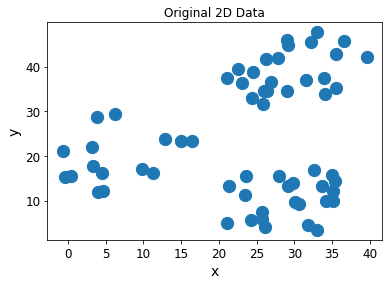

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x=X['x'], y=X['y'], s=150)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
ax.set_title('Original 2D Data')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

We only need the dimensions of the data points to test our algorithm so we create a subset of the dataset.

In [9]:
X_points = X[['x', 'y']]
X_points.head()

,x,y
0,24.412,32.932
1,35.190,12.189
2,26.288,41.718
3,0.376,15.506
4,26.116,3.963


There are 3 clusters in the dataset, so we will choose k = 3.

In [10]:
#np.random.seed(42)
k = 3
X_points['centroid'], X_points['error'], centroids =  kmeans(X_points[['x','y']], k)

Here's the top rows of our data frame with all data points, their assigned clusters and their distance to the centroid:

In [11]:
X_points.head()

,x,y,centroid,error
0,24.412,32.932,0,7.834572
1,35.190,12.189,2,6.116788
2,26.288,41.718,0,4.026919
3,0.376,15.506,1,7.197119
4,26.116,3.963,2,7.224168


Here are the coordinates of our final centroid:

In [12]:
centroids

,x,y
0,29.304957,39.050783
1,6.322867,19.559800
2,29.330864,10.432409


Let's visualize the clusters:

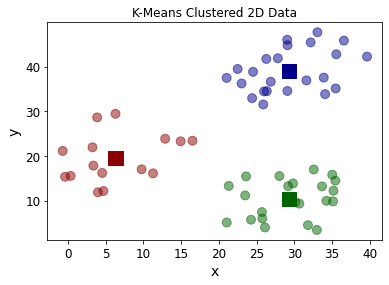

In [13]:
customcmap = ListedColormap(["darkblue", "darkred", "darkgreen"])
fig, ax = plt.subplots(figsize=(6, 4))
plt.scatter(X_points.iloc[:,0], X_points.iloc[:,1],  marker = 'o', 
            c=X_points['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2], 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
ax.set_title('K-Means Clustered 2D Data')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

We can see that these reproduced cluster are similar to the original ones. It's good to know that our algorithm works on a 2-dimnension dataset. Now let's check if it also works on a 3-dimension dataset.

We import make_blobs from sklearn to create a synthetic dataset with 500 observations, 3 features, all grouped in just 1 cluster.

In [7]:
from sklearn.datasets import make_blobs

In [8]:
X, Y = make_blobs(n_samples=500, centers=1, n_features=3, random_state=13)

In [9]:
df_3d = pd.DataFrame(data={'x': X[:, 0], 'y': X[:, 1], 'z': X[:, 2]})

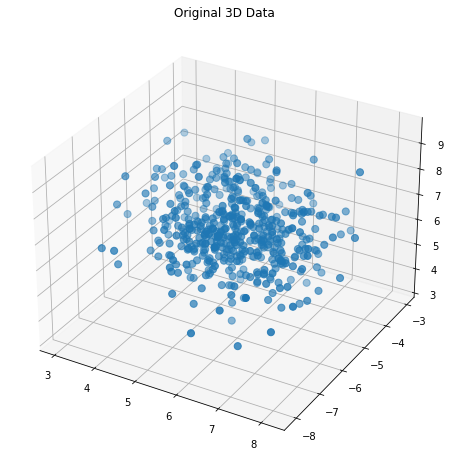

In [17]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
#fig, ax1 = plt.subplots(figsize=(12,8))
#ax = plt.axes(projection='3d')
ax.grid()
ax.scatter(df_3d.x, df_3d.y, df_3d.z, s=50)
ax.set_title('Original 3D Data')
plt.show()

We call the kmeans function on this 3D dataset.

In [20]:
np.random.seed(30)
k = 3
df_3d['centroid'], df_3d['error'], centroids_3d =  kmeans(df_3d[['x','y','z']], k)

In [21]:
df_3d.head()

,x,y,z,centroid,error
0,5.343763,-5.438526,5.403181,1,0.874748
1,3.478929,-5.093017,7.674637,2,1.612561
2,6.386681,-6.392806,7.578879,0,0.801060
3,4.926849,-4.603455,7.749220,2,1.117935
4,6.080032,-5.053919,6.032193,1,0.440963


In [22]:
centroids_3d

,x,y,z
0,5.767795,-6.075735,7.181208
1,6.168659,-5.253713,5.647309
2,4.686409,-4.734200,6.659138


In [93]:
# can see the 3D plot in interaction mode
#%matplotlib notebook

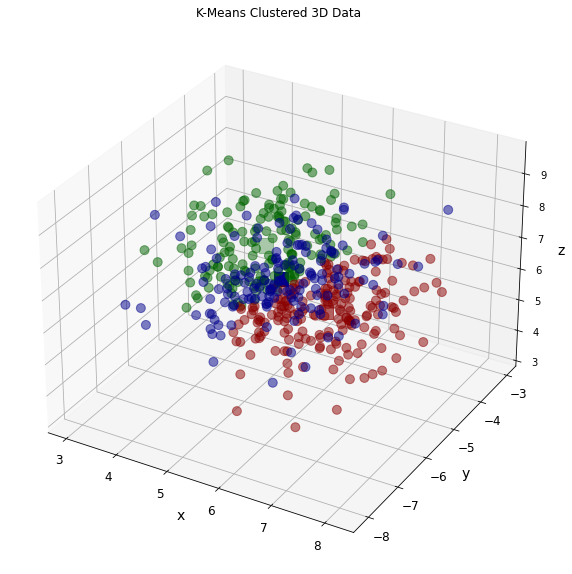

In [24]:
customcmap = ListedColormap(["darkblue", "darkred", "darkgreen"])
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')
ax.grid()

ax.scatter(df_3d.x, df_3d.y, df_3d.z, marker = 'o', 
            c=df_3d['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
ax.scatter(centroids_3d.x, centroids_3d.y, centroids_3d.z,  
            marker = 's', s=200, c=[0, 1, 2], 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
ax.set_zlabel(r'z', fontsize=14)
ax.set_title('K-Means Clustered 3D Data')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

It looks like we have just obtained our clusters for this 3D dataset.

### 5. K-Means Algorithm Application

Image compression is one of the most well-known applications of k-means algorithm. We can reconstruct an image using signigicantly fewer colors and therefore can reduce the file size of the image. Let's look at an example.

Here we have a beautiful picture of Machu Picchu, a world natural and culural heritage site in Peru.

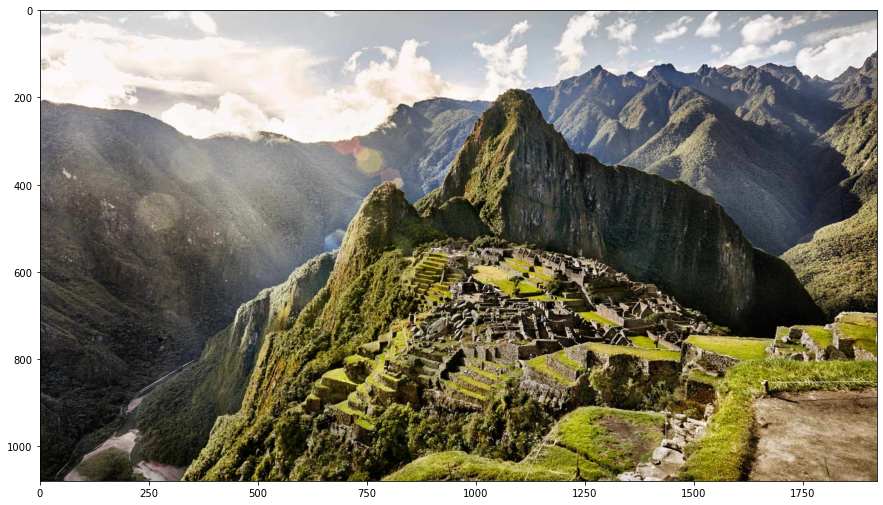

In [82]:
from skimage import io

fig, ax = plt.subplots(figsize=(15,10))
#Read the image
original_image = io.imread('images/original_image.jpeg')
plt.imshow(original_image)
plt.show()

In [83]:
print(f"file dimension: {original_image.shape}")

file dimension: (1080, 1920, 3)


The original image was made from millions of colors! We will try to build the same image with just 64 colors.

The idea is to represent each color with a 3-dimension (red, green, blue) vector. We will sort all colors into just 64 clusters using k-means clustering algorithm. These 64 colors are representative for that image. For example, if there are 200 shades of blue in the image, we just need to choose about 5 shades to reconstruct it. The image will look less vibrant (since we use fewer color); however, it will still be a good replica.

Since the number of observations for a flattened image is significantly greater than that of the examples demonstrated above, the simple algorithm we built will execute for an extremely long time. Therefore, let's look into the KMeans class of sklearn.cluster to save us some work.

In [67]:
# Flatten the image
rows = original_image.shape[0]
cols = original_image.shape[1]
original_image = original_image.reshape(rows*cols, 3)

Now we use sklearn's KMeans to find our clusters and centroids, then map each observation (original color) to its corresponding centroid. This is equivalent to replacing each original color with the color that best represents its group.

In [68]:
from sklearn.cluster import KMeans

#Implement k-means clustering to form k clusters
kmeans = KMeans(n_clusters=64)
kmeans.fit(original_image)

#Replace each pixel value with its nearby centroid
compressed_image = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image = compressed_image.reshape(rows, cols, 3)

#Save and display output image
io.imsave('images/compressed_image_64.jpeg', compressed_image)

Here are our original and compressed images. We can tell the difference in terms of colors but we can still regconize most features.

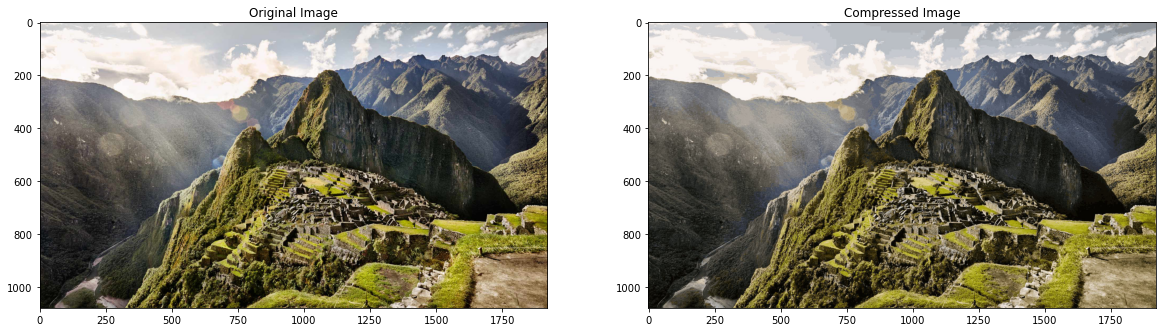

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(20,15))

original_image = io.imread('images/original_image.jpeg')
compressed_image = io.imread('images/compressed_image_64.jpeg')

ax[0].imshow(original_image)
ax[0].set_title('Original Image')
ax[1].imshow(compressed_image)
ax[1].set_title('Compressed Image')
plt.show()

### 6. K-Means Model Complexity

K-means algorithm's complexity is $O(m * k * I * n)$, where
- m: number of observations (points) in the dataset
- k: number of clusters
- I: number of iterations
- n: number of features in the dataset (the dimension of the data points)

### 7. Pros and Cons of K-Means

K-means, like any other algorithm, has its advantages and disadvantages:
#### Pros
- The intuition is simple enough to make implementation easy.
- It is scalable so we can perform it on datasets of all sizes.
- Its high performance thanks to linear complexity can provide insights into unlabeled data.

#### Cons
- K-means, like a lot of other distance-based algorithm, is sensitive to outliers.
- It takes quite some work to statistically choose good k values.
- It might produce different results given different centroid initialization.
- K-Means only generates linearly separable data clusters. If we have overlapping clusters or arbitrary shapes, it will not be able to handle those well.

$\pagebreak$

## III. Spectral Clustering

### 1. What Is Spectral Clustering Algorithm?

We have discussed K-means clustering algorithm. We will also take a look at spectral clustering, another popular clustering algorithm. Results obtained by spectral clustering have been proved to often outperform the traditional approaches. This clustering algorithm is also simple to implement and can be solved efficiently by standard linear algebra methods.

The purpose of spectral clustering is just standard like any other clustering methods: to divide data points into groups based on similarity. The similarity here refers to that of their spectral embedding. Spectral clustering is often used for cases of non-graphical data where traditional techniques like k-means are not helpful.

Here we will discuss less math and focus more on the big picture. Let's look at the example below. These data points are scattered in a more complex way than we have seen ealier in this report. If we use k-means, it will separate all points into 2 clusters by just a line, which does not give us much insight and interpretion of the data structure. Whereas if we use spectral clustering, the algorithm will actually divide data into groups such that they align with the structure of our data. Unlike k-means which assumes that the points assigned to a cluster are spherical about the cluster centroid, spectral clustering makes no assumptions about the form of the clusters.

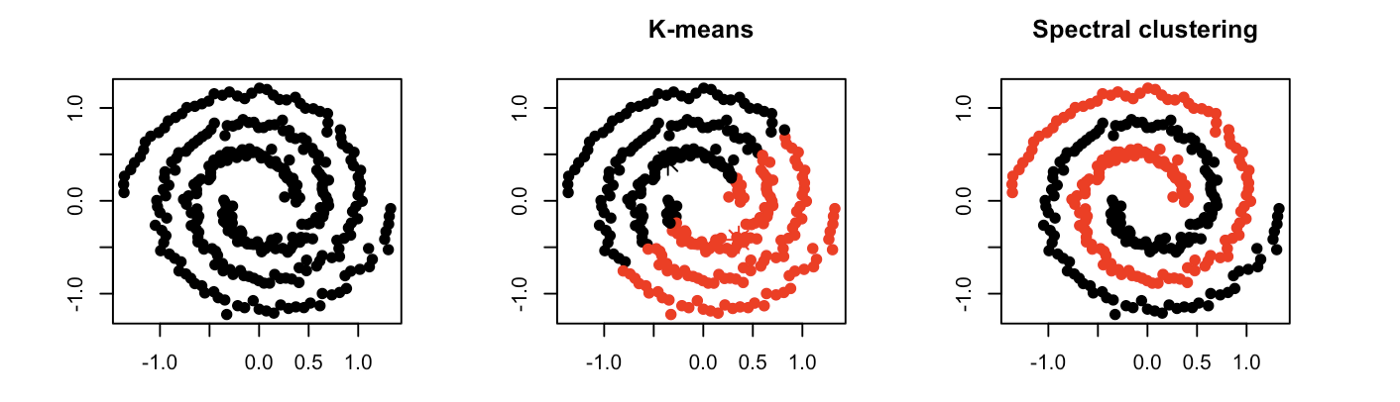

*Source: https://towardsdatascience.com/spectral-clustering-82d3cff3d3b7*

### 2. How Does Spectral Clustering Algorithm Work?

Spectral clustering algorithm is based on the idea that data points that are close together in the embedding space are likely to belong to the same cluster. The spectral embedding is constructed by calculating the eigenvectors and eigenvalues of the similarity matrix of the data points. The similarity matrix is usually a matrix that measures the similarity between each pair of data points, such as the Gaussian kernel matrix or the Laplacian matrix.

Spectral clustering is a technique based on graph theory. We want to identify communities of vertices in a graph based on the edges connecting them. This method is flexible and allows us to cluster non-graph data as well either with or without the original data.

We want to represent the data in form of the similarity graph $G = (V,E)$. Each vertex $v_i$ in this graph represents a data point $x_i$. Two vertices are connected if the similarity $s_{ij}$ between the corresponding data points $x_i$ and $x_j$ is positive or larger than a certain threshold, and the edge is weighted by $s_{ij}$. 

Here is an illustration of how the algorithm works.

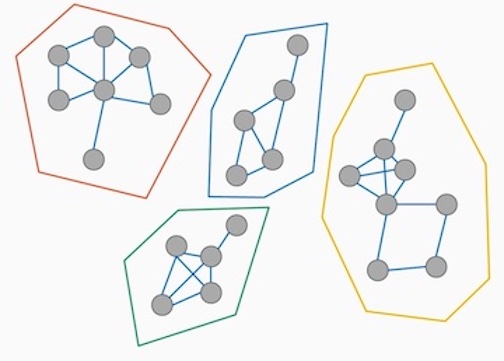

*Source: https://subscription.packtpub.com/book/big-data-and-business-intelligence/9781838823733/6/ch06lvl1sec44/spectral-clustering*

The three major steps involved in spectral clustering are: constructing a similarity graph, projecting data onto a lower-dimensional space, and clustering the data. Given a set of points S in a higher-dimensional space, it can be elaborated as follows:
1. Form a distance matrix
2. Transform the distance matrix into an affinity matrix A
3. Compute the degree matrix D. In the degree matrix, every cell in the diagonal is the sum of the weights for that point.
4. Find the Laplacian matrix L = D – A
5. Embed the data points in a low dimensional space (spectral embedding), in which the clusters are more obvious with the use of eigenvectors of the graph laplacian. We do this by finding the eigenvalues and eigenvectors of L.
6. Form a matrix with the eigenvectors of k largest eigenvalues computed from the previous step.
7. Normalize the vectors.
8. Cluster the data points in k-dimensional space.

### 3. Spectral Clustering Algorithm Implementation

Now let's implement spectral clustering.

In [228]:
from sklearn.neighbors import kneighbors_graph
from scipy import sparse
from scipy import linalg

def generate_graph_laplacian(df, nn):
    """Generate graph Laplacian from data."""
    
    # Adjacency Matrix.
    connectivity = kneighbors_graph(X=df, n_neighbors=nn, mode='connectivity')
    adjacency_matrix_s = (1/2)*(connectivity + connectivity.T)
    # Graph Laplacian.
    graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_matrix_s, normed=False)
    graph_laplacian = graph_laplacian_s.toarray()
    return graph_laplacian


def compute_spectrum_graph_laplacian(graph_laplacian):
    """Compute eigenvalues and eigenvectors and project 
    them onto the real numbers.
    """
    
    eigenvals, eigenvcts = linalg.eig(graph_laplacian)
    eigenvals = np.real(eigenvals)
    eigenvcts = np.real(eigenvcts)
    return eigenvals, eigenvcts


def project_and_transpose(eigenvals, eigenvcts, num_ev):
    """Select the eigenvectors corresponding to the first 
    (sorted) num_ev eigenvalues as columns in a data frame.
    """
    
    eigenvals_sorted_indices = np.argsort(eigenvals)
    indices = eigenvals_sorted_indices[: num_ev]
    proj_df = pd.DataFrame(eigenvcts[:, indices.squeeze()])
    proj_df.columns = ['v_' + str(c) for c in proj_df.columns]
    return proj_df


def run_k_means(df, n_clusters):
    """K-means clustering."""
    
    k_means = KMeans(random_state=25, n_clusters=n_clusters)
    k_means.fit(df)
    cluster = k_means.predict(df)
    return cluster


def spectral_clustering(df, n_neighbors, n_clusters):
    """Spectral Clustering Algorithm
    Given a dataframe, number of clusters wanted,
    and number of nearest neighbor for Laplacian graph,
    return the labels for all data points."""
    
    # step 1-4
    graph_laplacian = generate_graph_laplacian(df, n_neighbors)
    # step 5
    eigenvals, eigenvcts = compute_spectrum_graph_laplacian(graph_laplacian)
    # step 6-7
    proj_df = project_and_transpose(eigenvals, eigenvcts, n_clusters)
    # step 8
    cluster = run_k_means(proj_df, proj_df.columns.size)
    return [c for c in cluster]

We generate a synthetic data set that has a spiral shape to test our function spectral_clustering.

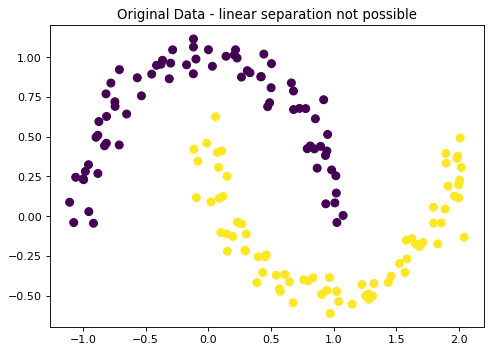

In [260]:
from sklearn.datasets import make_moons
random_state = 21
X_mn, y_mn = make_moons(150, noise=.07, random_state=random_state)
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title('Original Data - linear separation not possible')
ax.scatter(X_mn[:, 0], X_mn[:, 1],s=dot_size, cmap=cmap, c=y_mn)
plt.show()

In [261]:
# convert the coordinates into a pandas dataframe
X_mn_df = pd.DataFrame(data={'x': X_mn[:, 0], 'y': X_mn[:, 1]})

Before we test our spectral clustering algorithm, let's see how k-means does on this dataset.

In [262]:
k = 2
X_mn_df['centroid'], X_mn_df['error'], mn_centroids =  kmeans(X_mn_df[['x','y']], k)

Let's visualize the clusters:

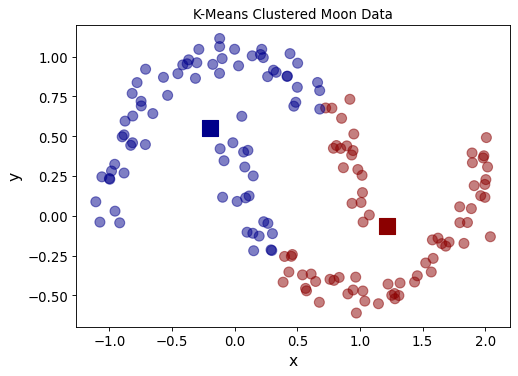

In [263]:
customcmap = ListedColormap(["darkblue", "darkred"])
fig, ax = plt.subplots(figsize=(7, 5))
plt.scatter(X_mn_df.iloc[:,0], X_mn_df.iloc[:,1],  marker = 'o', 
            c=X_mn_df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(mn_centroids.iloc[:,0], mn_centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1], 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
ax.set_title('K-Means Clustered Moon Data')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

As expected, k-means separate the points with a straight line.

Now let's see what spectral clustering will do with this dataset.

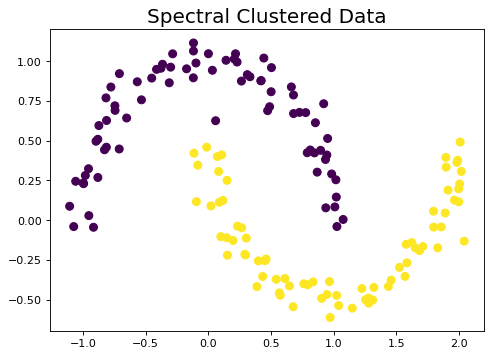

In [264]:
X_mn_df = pd.DataFrame(data={'x': X_mn[:, 0], 'y': X_mn[:, 1]})
sc_labels = spectral_clustering(X_mn_df, n_neighbors=8, n_clusters=2)
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title('Spectral Clustered Data', fontsize=18)
plt.scatter(X_mn[:, 0], X_mn[:, 1], c=sc_labels, s=50)
plt.show()

This result by spectral clustering makes more sense in terms of data structure. The clusters are very similar to those in our original image. With this it will be easier for us to gain some insight of the dataset.

Let's look at another example with a more complex dataset. We will generate a dataset with 3 circles.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

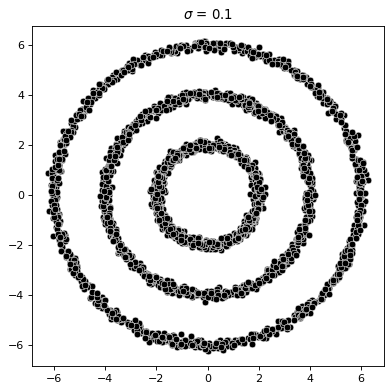

In [279]:
# Set global plot parameters. 
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 80

# Number of points per circle. 
n = 1000
# Radius. 
r_list =[2, 4, 6]
# Standar deviation (Gaussian noise). 
sigmas = [0.1]

param_lists = [[(r, n, sigma) for r in r_list] for sigma in sigmas] 
# We store the data on this list.
coordinates_list = []

fig, ax = plt.subplots(figsize=(5, 5))

for i, param_list in enumerate(param_lists):

    coordinates = generate_concentric_circles_data(param_list)

    coordinates_list.append(coordinates)
    
    for j in range(0, len(coordinates)):
    
        x, y = coordinates[j]
        sns.scatterplot(x=x, y=y, color='black', ax=ax)
        ax.set(title=f'$\sigma$ = {param_list[0][2]}')

plt.tight_layout()

In [280]:
from itertools import chain

coordinates = coordinates_list[0]

def data_frame_from_coordinates(coordinates): 
    """From coordinates to data frame."""
    xs = chain(*[c[0] for c in coordinates])
    ys = chain(*[c[1] for c in coordinates])
    return pd.DataFrame(data={'x': xs, 'y': ys})

circles_df = data_frame_from_coordinates(coordinates)

Perform spectral clustering on this circles dataset.

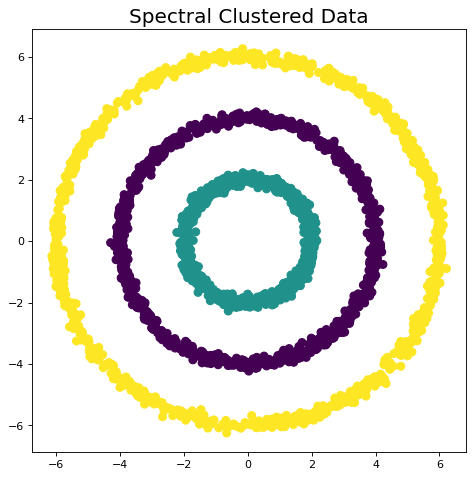

In [278]:
sc_labels = spectral_clustering(circles_df, n_neighbors=8, n_clusters=3)
fig, ax = plt.subplots(figsize=(7,7))
ax.set_title('Spectral Clustered Data', fontsize=18)
plt.scatter(circles_df.x, circles_df.y, c=sc_labels, s=50)
plt.show()

From the examples above, we see how powerful spectral clustering can be when it comes to unsupervised machine learning. In general, clustering algorithms can be applied widely in various fields such as anomaly detection, image segmentation, search result grouping, market segmentation, and social network analysis.

$\pagebreak$

## References
https://www.freecodecamp.org/news/8-clustering-algorithms-in-machine-learning-that-all-data-scientists-should-know/#:~:text=K%2Dmeans%20clustering%20is%20the,introduced%20to%20unsupervised%20machine%20learning.

https://www.mathsisfun.com/geometry/centroid.html

https://medium.datadriveninvestor.com/k-means-clustering-ac3ff1d3463d

https://www.datasciencecentral.com/machine-learning-unsupervised-k-means-clustering-and/

https://www.dominodatalab.com/blog/getting-started-with-k-means-clustering-in-python

https://figshare.com/articles/dataset/K_Means_-_Data_Blobs/19102187/3

https://towardsdatascience.com/image-compression-using-k-means-clustering-aa0c91bb0eeb

https://holypython.com/k-means/k-means-pros-cons/

https://www.analyticsvidhya.com/blog/2020/10/a-simple-explanation-of-k-means-clustering/

https://people.csail.mit.edu/dsontag/courses/ml14/notes/Luxburg07_tutorial_spectral_clustering.pdf

https://towardsdatascience.com/spectral-clustering-82d3cff3d3b7

https://www.mygreatlearning.com/blog/introduction-to-spectral-clustering/

https://www.analyticsvidhya.com/blog/2021/05/what-why-and-how-of-spectral-clustering/

https://juanitorduz.github.io/spectral_clustering/

https://medium.com/@tomernahshon/spectral-clustering-from-scratch-38c68968eae0

https://stackabuse.com/k-means-elbow-method-and-silhouette-analysis-with-yellowbrick-and-scikit-learn/

https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find-best-k-in-k-means-clustering-fc820da0631d